<a href="https://colab.research.google.com/github/MapariPrajwal/DataScience/blob/main/Makerable_pre_interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Load dataset (assuming CSV format)
df = pd.read_csv('/content/employee_experience_survey_data.csv')


In [4]:
# Check for missing values
df.isnull().sum()

# Encoding Likert scale responses (assuming they are textual)
likert_mapping = {'Strongly Disagree': 1, 'Disagree': 2, 'Neutral': 3, 'Agree': 4, 'Strongly Agree': 5}
df.replace(likert_mapping, inplace=True)


<ipython-input-4-65e6ec0842d5>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(likert_mapping, inplace=True)


In [5]:
# Descriptive statistics for Overall Engagement and Job Satisfaction
overall_engagement_stats = df['Overall Engagement'].describe()
job_satisfaction_stats = df['Job Satisfaction'].describe()

print("Overall Engagement Stats:\n", overall_engagement_stats)
print("\nJob Satisfaction Stats:\n", job_satisfaction_stats)

Overall Engagement Stats:
 count    15.000000
mean      3.400000
std       1.298351
min       1.000000
25%       2.500000
50%       3.000000
75%       4.500000
max       5.000000
Name: Overall Engagement, dtype: float64

Job Satisfaction Stats:
 count    15.000000
mean      3.000000
std       1.309307
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Job Satisfaction, dtype: float64



Job Satisfaction by Age Bracket:
 Age Bracket
18-24    3.428571
25-34    3.000000
35-44    2.000000
45-54    2.666667
Name: Job Satisfaction, dtype: float64

Job Satisfaction by Department:
 Department
Consulting             3.000000
Design                 5.000000
Finance                4.000000
HR                     4.000000
IT                     1.000000
Operations             2.000000
Product Development    2.666667
Sales                  2.750000
Name: Job Satisfaction, dtype: float64


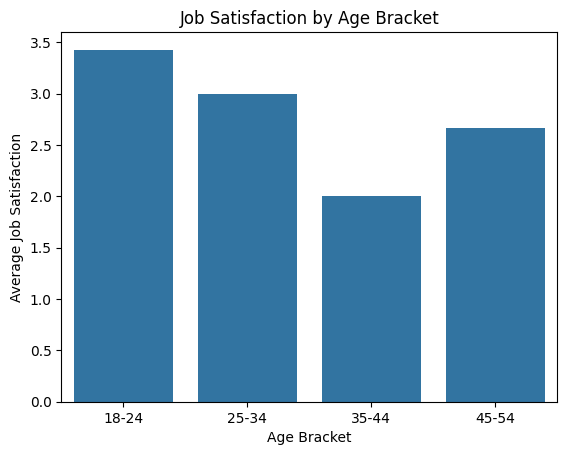

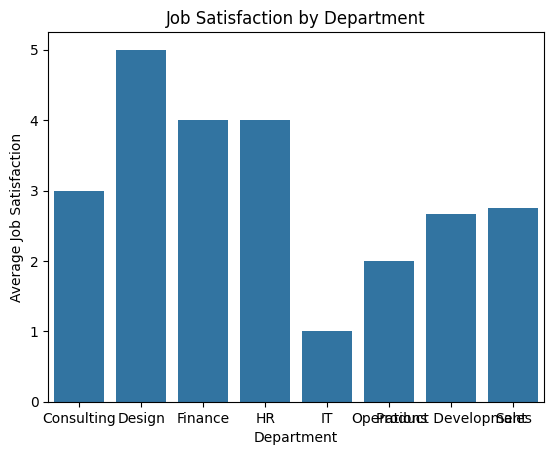

In [6]:
# Group by Age Bracket and Department to calculate mean Job Satisfaction
age_bracket_satisfaction = df.groupby('Age Bracket')['Job Satisfaction'].mean()
department_satisfaction = df.groupby('Department')['Job Satisfaction'].mean()

print("\nJob Satisfaction by Age Bracket:\n", age_bracket_satisfaction)
print("\nJob Satisfaction by Department:\n", department_satisfaction)

# Visualize
sns.barplot(x=age_bracket_satisfaction.index, y=age_bracket_satisfaction.values)
plt.title('Job Satisfaction by Age Bracket')
plt.ylabel('Average Job Satisfaction')
plt.show()

sns.barplot(x=department_satisfaction.index, y=department_satisfaction.values)
plt.title('Job Satisfaction by Department')
plt.ylabel('Average Job Satisfaction')
plt.show()


In [7]:
it_satisfaction = df[df['Department'] == 'IT']['Job Satisfaction']
hr_satisfaction = df[df['Department'] == 'HR']['Job Satisfaction']

t_stat, p_value = stats.ttest_ind(it_satisfaction, hr_satisfaction)

print(f"T-statistic: {t_stat}, P-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in Job Satisfaction between IT and HR.")
else:
    print("Fail to reject the null hypothesis. No significant difference found.")


T-statistic: -1.7320508075688774, P-value: 0.33333333333333326
Fail to reject the null hypothesis. No significant difference found.


In [8]:
# Perform Pearson correlation
corr, p_value = stats.pearsonr(df['Work-Life Balance'], df['Overall Engagement'])

print(f"Correlation Coefficient: {corr}, P-value: {p_value}")

# Interpretation
if corr > 0:
    print("There is a positive relationship between Work-Life Balance and Overall Engagement.")
else:
    print("There is a negative relationship between Work-Life Balance and Overall Engagement.")

Correlation Coefficient: -0.361040820409166, P-value: 0.18612659993280437
There is a negative relationship between Work-Life Balance and Overall Engagement.


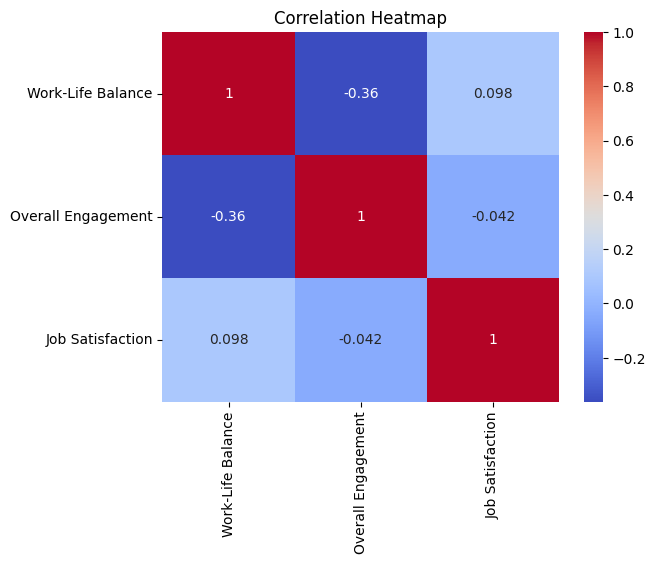

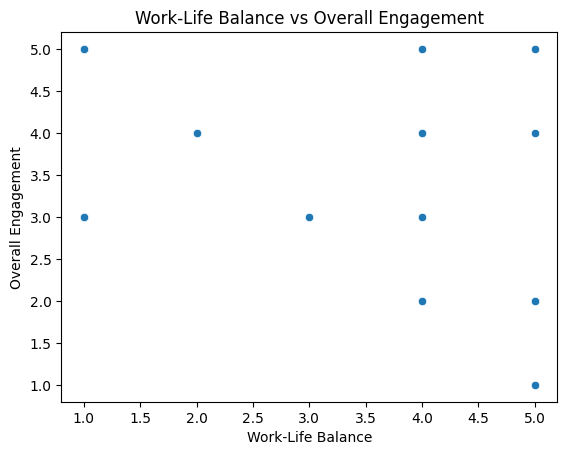

In [9]:
# Correlation heatmap
corr_matrix = df[['Work-Life Balance', 'Overall Engagement', 'Job Satisfaction']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot for Work-Life Balance vs Overall Engagement
sns.scatterplot(x='Work-Life Balance', y='Overall Engagement', data=df)
plt.title('Work-Life Balance vs Overall Engagement')
plt.show()